# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [68]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [69]:
import os
cout = []
names = {}
i = 0
for dirName, subdirList, fileList in os.walk("/data/lfw", topdown=False):
    cout.append(len(fileList))
    names[i] = dirName
    i+=1

print("people with maximum number of pictures: {}, the number of pictures is: {}".format(names[np.argmax(cout[:-1])], max(cout[:-1])))
print("people with maximum number of pictures: {}, the number of pictures is: {}".format(names[np.argmin(cout[:-1])], min(cout[:-1])))

people with maximum number of pictures: /data/lfw/George_W_Bush, the number of pictures is: 530
people with maximum number of pictures: /data/lfw/Dan_Ackroyd, the number of pictures is: 1


In [70]:
import os

def check_dog_breed(dataset):
    
    print("checking {} dataset...".format(dataset))
    cout = []
    names = {}
    i = 0
    for dirName, subdirList, fileList in os.walk("/data/dog_images/{}".format(dataset), topdown=False):
        #print('Found directory: %s' % dirName)
        if dirName[22 + len(dataset):].replace('_', " ") != "":
            cout.append(len(fileList))
            names[i] = dirName[22 + len(dataset):].replace('_', " ")
            i+=1

    print("dog breed with maximum number of pictures: {}, the number of pictures is: {}".format(names[np.argmax(cout[:-1])], max(cout[:-1])))
    print("dog breed with maximum number of pictures: {}, the number of pictures is: {}".format(names[np.argmin(cout[:-1])], min(cout[:-1])))
    
    import pandas as pd
    breed = pd.DataFrame(list(names.values()), columns=['Breed'])
    data = pd.DataFrame(cout, columns=[dataset])
    data = pd.concat([breed, data], axis=1)
    
    return data

In [71]:
import matplotlib.pyplot as plt

def visualize_breed(data, dataset):
    plt.figure(figsize = (22, 12))

    plt.bar(data['Breed'], data[dataset])

    plt.xticks(rotation = 90)

    plt.xlabel('Dog Breed', fontsize = 15)
    plt.ylabel('Image counts', fontsize = 15)
    plt.title('Distribution of images in the {} dataset'.format(dataset), fontsize = 20)

    plt.show()
    

checking train dataset...
dog breed with maximum number of pictures: Alaskan malamute, the number of pictures is: 77
dog breed with maximum number of pictures: Norwegian buhund, the number of pictures is: 26


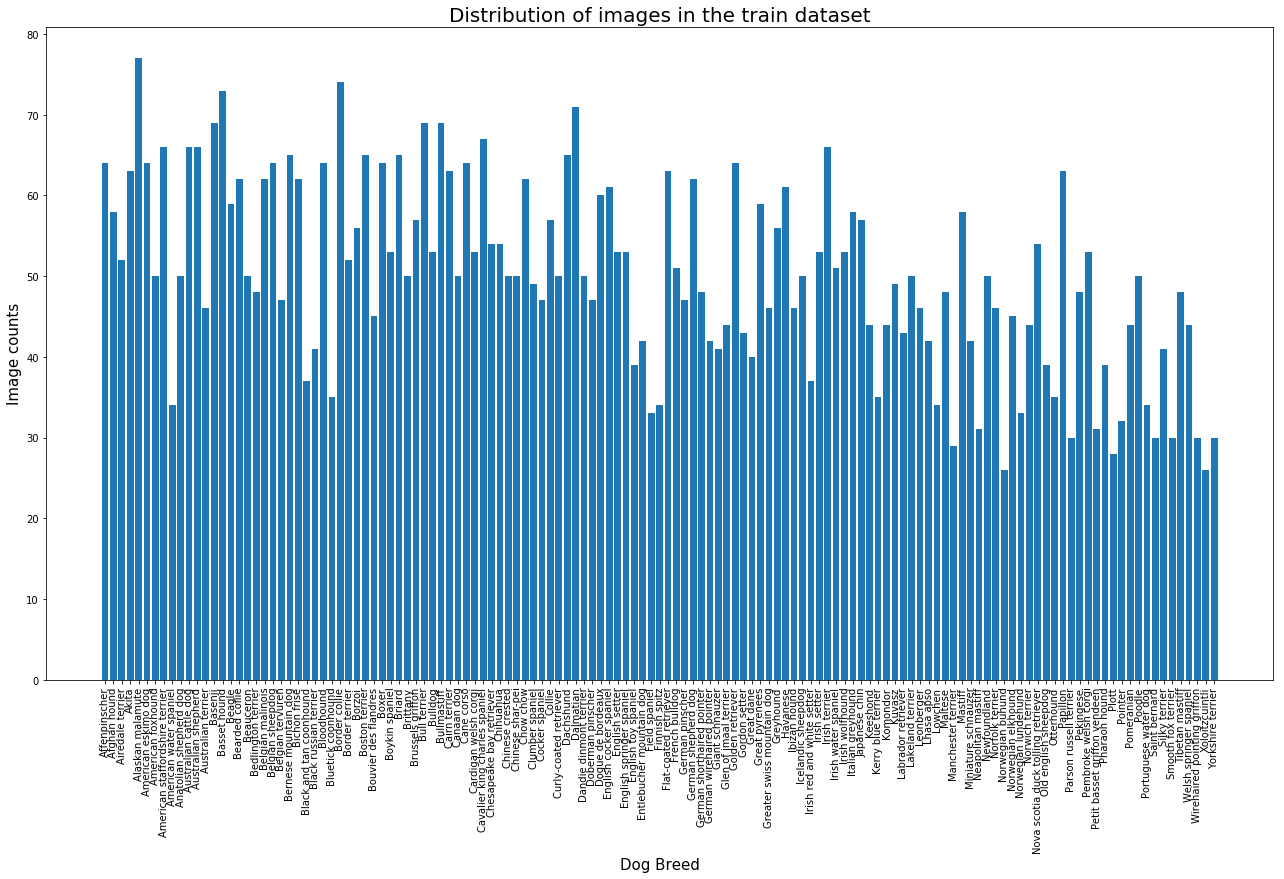

In [72]:
cout_train = check_dog_breed('train')
visualize_breed(cout_train, 'train')

checking test dataset...
dog breed with maximum number of pictures: Alaskan malamute, the number of pictures is: 10
dog breed with maximum number of pictures: Saint bernard, the number of pictures is: 3


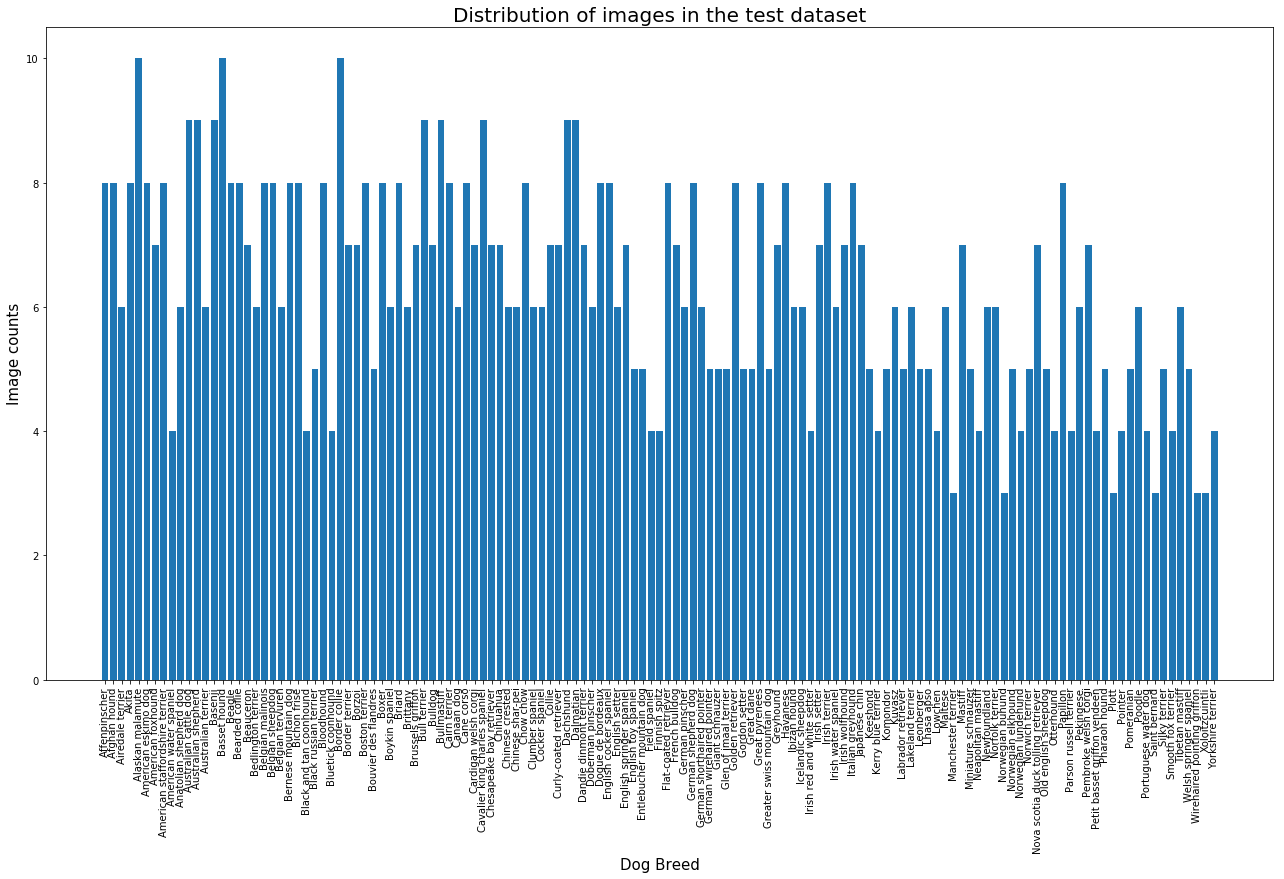

In [73]:
cout_test = check_dog_breed('test')
visualize_breed(cout_test, 'test')

checking valid dataset...
dog breed with maximum number of pictures: Alaskan malamute, the number of pictures is: 9
dog breed with maximum number of pictures: Finnish spitz, the number of pictures is: 4


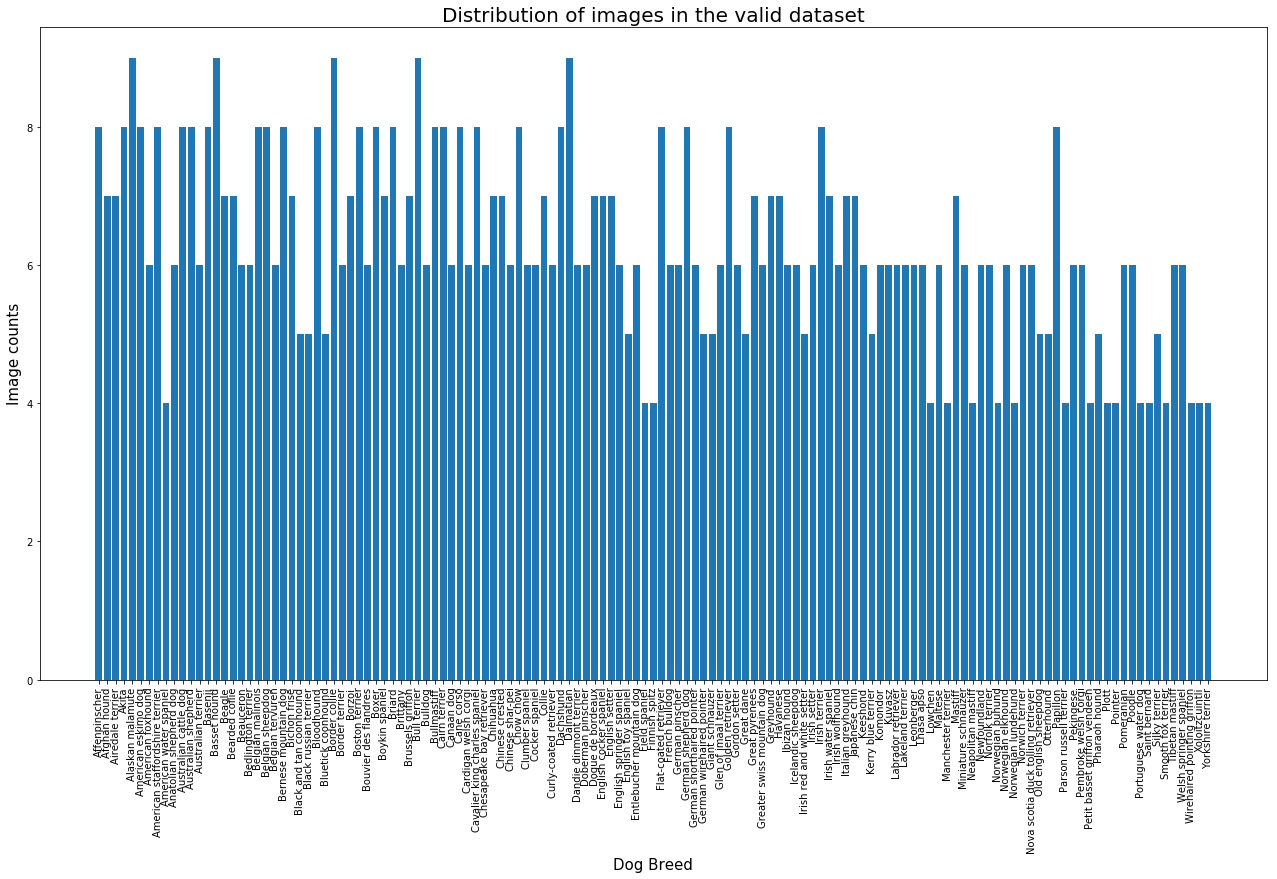

In [74]:
cout_valid = check_dog_breed('valid')
visualize_breed(cout_valid, 'valid')

In [75]:
cout = cout_train.merge(cout_valid, on='Breed')
cout = cout.merge(cout_test, on='Breed')
cout

Breed  train  valid  test
0                               Mastiff     58      7     7
1                     Doberman pinscher     47      6     6
2                Curly-coated retriever     50      6     7
3                                Borzoi     56      7     7
4                          Bichon frise     62      7     8
5                       Chinese crested     50      7     6
6                         Finnish spitz     34      4     4
7                Welsh springer spaniel     44      6     5
8                    Bedlington terrier     48      6     6
9                              Papillon     63      8     8
10                        Saint bernard     30      4     3
11                   Australian terrier     46      6     6
12               Parson russell terrier     30      4     4
13                      Norfolk terrier     46      6     6
14                    Yorkshire terrier     30      4     4
15                       Boston terrier     65      8     8
16                     Norwegian buhund     26      4     3
17                   Bluetick coonhound     35      5     4
18                        Field spaniel     33      4     4
19                      Tibetan mastiff     48      6     6
20                     Alaskan malamute     77      9    10
21                   Manchester terrier     29      4     3
22                                Boxer     64      8     8
23                Flat-coated retriever     63      8     8
24                      Irish wolfhound     53      6     7
25                  Miniature schnauzer     42      6     5
26                       Boykin spaniel     53      7     6
27           Greater swiss mountain dog     46      6     5
28                    American foxhound     50      6     7
29   Nova scotia duck tolling retriever     54      6     7
..                                  ...    ...    ...   ...
103                   Italian greyhound     58      7     8
104                    Chinese shar-pei     50      6     6
105                        Irish setter     53      6     7
106                            Brittany     50      6     6
107                               Plott     28      4     3
108                             Basenji     69      8     9
109                      Border terrier     52      6     7
110                      Great pyrenees     59      7     8
111                  Labrador retriever     43      6     5
112                          Bloodhound     64      8     8
113                           Chihuahua     54      7     7
114        Petit basset griffon vendeen     31      4     4
115                              Poodle     50      6     6
116              Dandie dinmont terrier     50      6     7
117                     Clumber spaniel     49      6     6
118                    Brussels griffon     57      7     7
119                Old english sheepdog     39      5     5
120                           Dalmatian     71      9     9
121                      Cocker spaniel     47      6     6
122                             Pointer     32      4     4
123                       Gordon setter     43      6     5
124           German wirehaired pointer     42      5     5
125                 Irish water spaniel     51      7     6
126                     Norwich terrier     44      6     5
127                  Norwegian elkhound     45      6     5
128                       Affenpinscher     64      8     8
129                        Basset hound     73      9    10
130                             Maltese     48      6     6
131                            Keeshond     44      6     5
132                             Lowchen     34      4     4

[133 rows x 4 columns]

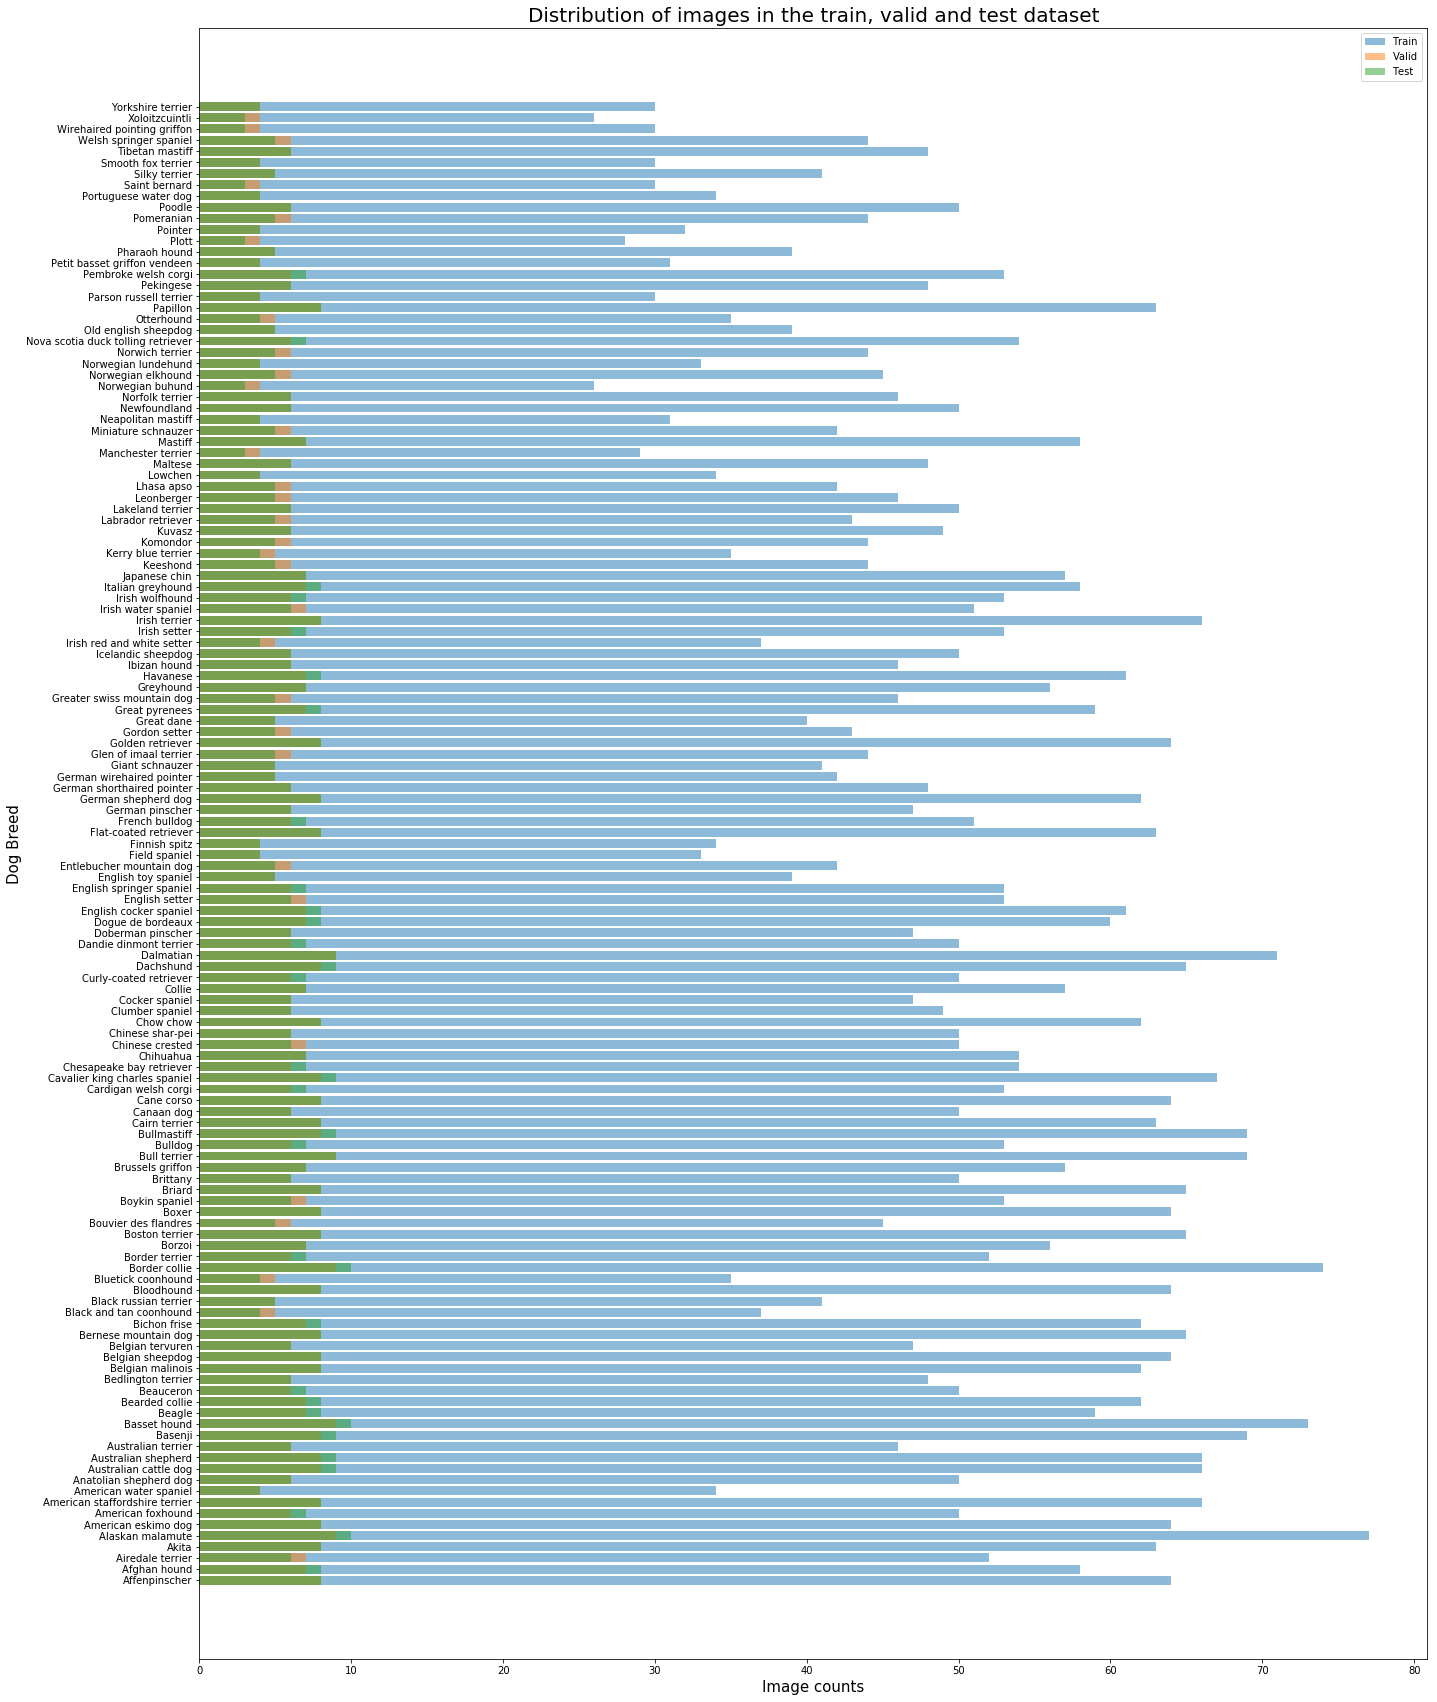

In [76]:
plt.figure(figsize = (22, 30))
plt.barh(cout.Breed, cout.train, alpha=0.5)
plt.barh(cout.Breed, cout.valid, alpha=0.5)
plt.barh(cout.Breed, cout.test, alpha=0.5)
plt.legend(['Train', 'Valid', 'Test'])
plt.xlabel('Image counts', fontsize = 15)
plt.ylabel('Dog Breed', fontsize = 15)
plt.title('Distribution of images in the train, valid and test dataset', fontsize = 20)
plt.show()

In [77]:
dog_files_train = np.array(glob("/data/dog_images/train/*/*"))
dog_files_valid = np.array(glob("/data/dog_images/valid/*/*"))
dog_files_test = np.array(glob("/data/dog_images/test/*/*"))

# print number of images in each dataset
print('There are %d total train images.' % len(dog_files_train))
print('There are %d total valid images.' % len(dog_files_valid))
print('There are %d total test images.' % len(dog_files_test))

There are 6680 total train images.
There are 835 total valid images.
There are 836 total test images.


In [78]:
import cv2
import pandas as pd

def check_img_size(img_type, dataset):
    
    print("checking {} dataset...".format(dataset))
    x = []
    y = []
    z = []
    if dataset == "":
        directory = "/data/{}".format(img_type)
    else:
        directory = "/data/{}/{}".format(img_type, dataset)
    for dirName, subdirList, fileList in os.walk(directory, topdown=False):
        # print('Found directory: %s' % dirName)
        for file in fileList:
            # print(os.path.join(dirName, file))
            im = cv2.imread(os.path.join(dirName, file))
            x_t,y_t,z_t = im.shape
            x.append(x_t)
            y.append(y_t)
            z.append(z_t)
                
    x = pd.DataFrame(x, columns=['width'])
    y = pd.DataFrame(y, columns=['length'])
    z = pd.DataFrame(z, columns=['color'])
    data = pd.concat([x, y, z], axis=1)
    
    return data


In [79]:
# check dog
train_df = check_img_size('dog_images', 'train')
test_df = check_img_size('dog_images', 'test')
valid_df = check_img_size('dog_images', 'valid')

checking train dataset...
checking test dataset...
checking valid dataset...


In [80]:
print("Minimum width and length in train:")
train_df.width.min(), train_df.length.min(), valid_df.color.unique()

Minimum width and length in train:


(113, 112, array([3]))

In [81]:
print("Minimum width and length in valid:")
valid_df.width.min(), valid_df.length.min(), valid_df.color.unique()

Minimum width and length in valid:


(120, 105, array([3]))

In [82]:
print("Minimum width and length in test:")
test_df.width.min(), test_df.length.min(), test_df.color.unique()

Minimum width and length in test:


(153, 121, array([3]))

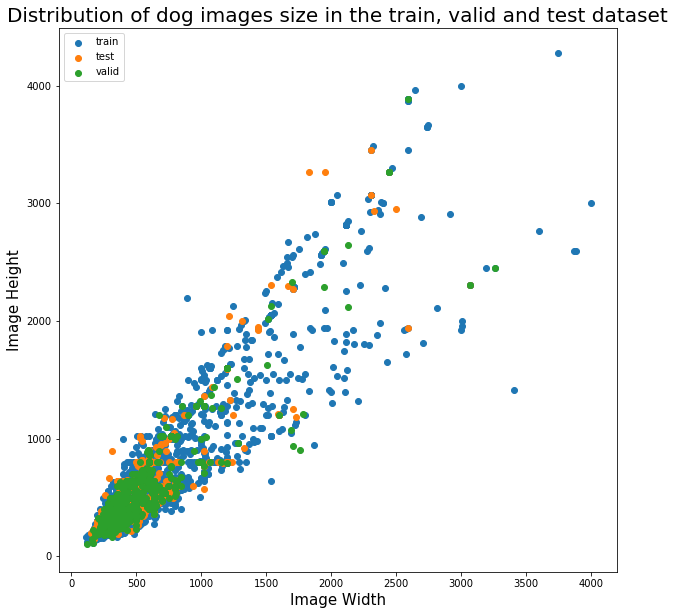

In [83]:
plt.figure(figsize = (10, 10))
plt.scatter(train_df.width, train_df.length)
plt.scatter(test_df.width, test_df.length)
plt.scatter(valid_df.width, valid_df.length)
plt.legend(['train', 'test', 'valid'])
plt.xlabel('Image Width', fontsize = 15)
plt.ylabel('Image Height', fontsize = 15)
plt.title('Distribution of dog images size in the train, valid and test dataset', fontsize = 20)
plt.show()

In [84]:
df = check_img_size('lfw', '')

checking  dataset...


In [85]:
df.head(20)

width  length  color
0     250     250      3
1     250     250      3
2     250     250      3
3     250     250      3
4     250     250      3
5     250     250      3
6     250     250      3
7     250     250      3
8     250     250      3
9     250     250      3
10    250     250      3
11    250     250      3
12    250     250      3
13    250     250      3
14    250     250      3
15    250     250      3
16    250     250      3
17    250     250      3
18    250     250      3
19    250     250      3

In [86]:
df.width.min(), df.length.min(), df.color.unique()

(250, 250, array([3]))

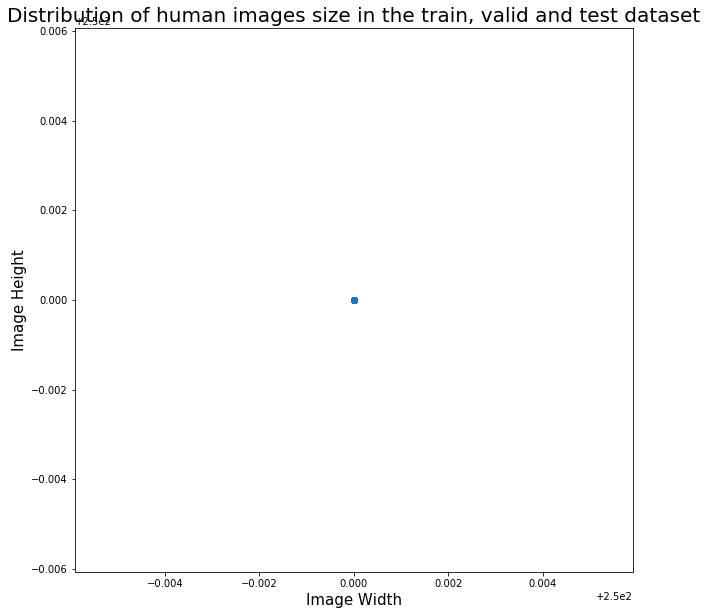

In [87]:
plt.figure(figsize = (10, 10))
plt.scatter(df.width, df.length)

plt.xlabel('Image Width', fontsize = 15)
plt.ylabel('Image Height', fontsize = 15)
plt.title('Distribution of human images size in the train, valid and test dataset', fontsize = 20)
plt.show()

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


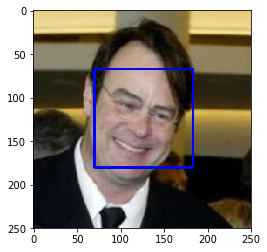

In [88]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [89]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [90]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
res = []
for i in range(100):
    if (face_detector(human_files_short[i])):
        res.append(1)
    else:
        res.append(0)

print("Percentage of the first 100 images in human_files have human face: {}".format(sum(res)/len(human_files_short)))

res = []
for i in range(100):
    if (face_detector(dog_files_short[i])):
        res.append(1)
    else:
        res.append(0)

print("Percentage of the first 100 images in dog_files have human face: {}".format(sum(res)/len(dog_files_short)))

Percentage of the first 100 images in human_files have human face: 0.98
Percentage of the first 100 images in dog_files have human face: 0.17


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [91]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [92]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    input_image = Image.open(img_path)
    preprocess = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ])
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    
    if use_cuda:
        input_batch = input_batch.cuda()
    output = VGG16(input_batch)
    # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
    # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    
    top_prob, top_catid = torch.topk(probabilities, 1)
    # print("Top class index: {}, top class probability: {}".format(top_catid, top_prob))

    return top_catid.item() # predicted class index


In [93]:
VGG16_predict(dog_files_short[0])

243

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [94]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.

    top_catid = VGG16_predict(img_path)
    
    return ((top_catid >= 151) & (top_catid <=268))  # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
Please see the print out below:

In [29]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

res = []
for i in range(100):
    if (dog_detector(human_files_short[i])):
        res.append(1)
    else:
        res.append(0)

print("Percentage of the first 100 images in human_files have dog face: {}".format(sum(res)/len(human_files_short)))

res = []
for i in range(100):
    if (dog_detector(dog_files_short[i])):
        res.append(1)
    else:
        res.append(0)

print("Percentage of the first 100 images in dog_files have dog face: {}".format(sum(res)/len(dog_files_short)))

Percentage of the first 100 images in human_files have dog face: 0.0
Percentage of the first 100 images in dog_files have dog face: 1.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [30]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [95]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 1
# how many samples per batch to load
batch_size = 20

train_data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomSizedCrop(224),
        #transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

loaders_scratch = {}
loaders_scratch['train'] = DataLoader(datasets.ImageFolder('/data/dog_images/train', transform=train_data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['valid'] = DataLoader(datasets.ImageFolder('/data/dog_images/valid', transform=data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_scratch['test'] = DataLoader(datasets.ImageFolder('/data/dog_images/test', transform=data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)

class_names = [nm[4:] for nm in loaders_scratch['train'].dataset.classes]

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.


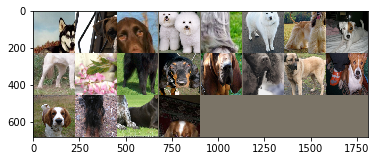

In [97]:
from torchvision.utils import make_grid
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(loaders_scratch['train']))

# Make a grid from batch
out = make_grid(inputs)

imshow(out)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**: For dog classification models from scratch and using resnet models, training data were resized to 256 \* 256 pixels, then randomly cropped to 224 \* 224 pixels for data augmentation and random horizontal flipped. The images were then transformed to tensor type and normalized. Testing and validation data were resized to 256 \* 256 pixels, then center cropped to 224 \* 224 pixels for data augmentation. The image sizes where chosen based on the results from exploratory data analysis that majoriy of the image have size greater to 200 \* 200 pixels and the smallest image was around 100 \* 100 pixels. Random cropping and random rotating was used for training data as it helped with overfitting of the data and improved training accuracy.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [33]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer 
        self.conv1 = nn.Conv2d(in_channels = 3, out_channels = 64, kernel_size = 7, stride=2, padding=1)

        # convolutional layer 
        self.conv2 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding=1)
        # convolutional layer 
        self.conv3 = nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding=1)
        # convolutional layer 
        self.conv4 = nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding=1)
        # convolutional layer 
        self.conv5 = nn.Conv2d(in_channels = 128, out_channels = 128, kernel_size = 3, padding=1)
        # convolutional layer 
        self.conv6 = nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding=1)
        self.conv6_bn = nn.BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # linear layer 
        self.fc1 = nn.Linear(in_features = 256, out_features = 133)

        # dropout layer
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        x = self.pool(self.conv6_bn(F.relu(self.conv6(x))))
        # flatten image input
        x = x.view(-1, 256)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))

        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [34]:
model_scratch

Net(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(1, 1))
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6_bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=256, out_features=133, bias=True)
  (dropout): Dropout(p=0.3)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ A simplified resnet18 model was constructed. As a resnet18 model will be tested later in the project, the simplified model would be compared with the original model. This simplification allowed less convolution layers and less computation. The linear layer have out features being 133 because there are 133 breed to predict. Dropout with proability = 0.3 was used to remove noisy data.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [35]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion_scratch = nn.CrossEntropyLoss()

# specify optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [36]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [108]:
import pandas as pd
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    train_record = pd.DataFrame(columns = ['train_loss', 'valid_loss'])
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
    
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
#             import pdb; pdb.set_trace()
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            # train_loss += loss.item()*data.size(0)
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            # valid_loss += loss.item()*data.size(0)
            # update　average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
        
        train_record = pd.concat([train_record, pd.DataFrame({'train_loss':[train_loss.item()], 'valid_loss':[valid_loss.item()]})])
    # return trained model
    return model, train_record


# train the model
model_scratch, train_record = train(60, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 3.475990 	Validation Loss: 3.159724
Validation loss decreased (inf --> 3.159724).  Saving model ...
Epoch: 2 	Training Loss: 3.438021 	Validation Loss: 3.188679
Epoch: 3 	Training Loss: 3.389410 	Validation Loss: 3.070366
Validation loss decreased (3.159724 --> 3.070366).  Saving model ...
Epoch: 4 	Training Loss: 3.334317 	Validation Loss: 3.133108
Epoch: 5 	Training Loss: 3.320978 	Validation Loss: 3.040675
Validation loss decreased (3.070366 --> 3.040675).  Saving model ...
Epoch: 6 	Training Loss: 3.235804 	Validation Loss: 3.116744
Epoch: 7 	Training Loss: 3.206174 	Validation Loss: 3.031306
Validation loss decreased (3.040675 --> 3.031306).  Saving model ...
Epoch: 8 	Training Loss: 3.166250 	Validation Loss: 2.928762
Validation loss decreased (3.031306 --> 2.928762).  Saving model ...
Epoch: 9 	Training Loss: 3.145696 	Validation Loss: 2.933522
Epoch: 10 	Training Loss: 3.128979 	Validation Loss: 2.825111
Validation loss decreased (2.928762 --> 2.825111)

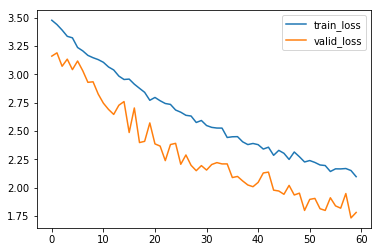

In [109]:
# plot training loss and validation loss
train_record = train_record.reset_index(drop=True)
train_record.plot()

In [110]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [111]:
def visualize_model(model,dataloaders, use_cuda, class_names, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (data, target) in enumerate(dataloaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            outputs = model(data)
            _, preds = torch.max(outputs, 1)

            for j in range(data.size()[0]):
                images_so_far += 1
                ax = plt.subplot()
                ax.axis('off')
                ax.set_title('predicted: {}, \nactual: {}'.format(class_names[preds[j]], class_names[target[j]]))
                imshow(data.cpu().data[j])

                if images_so_far == num_images:
                   model.train(mode=was_training)
                   return
        model.train(mode=was_training)

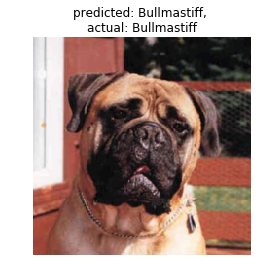

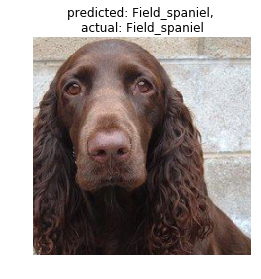

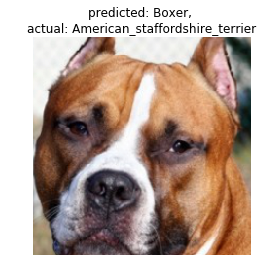

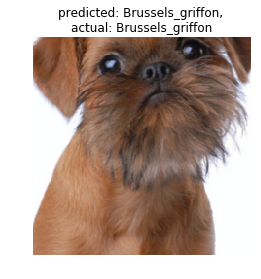

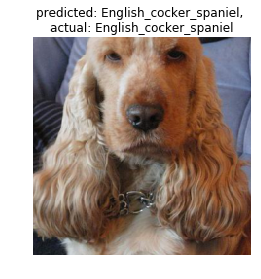

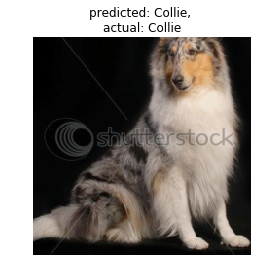

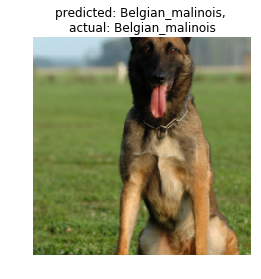

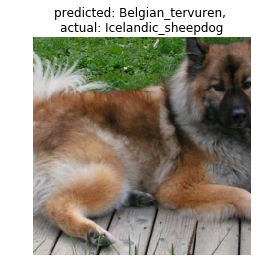

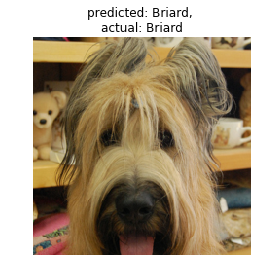

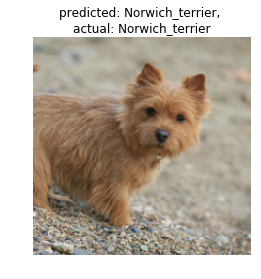

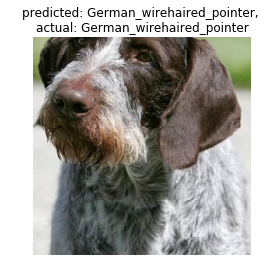

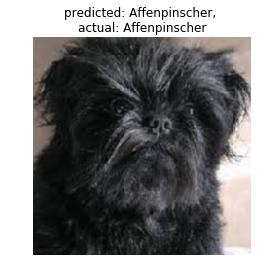

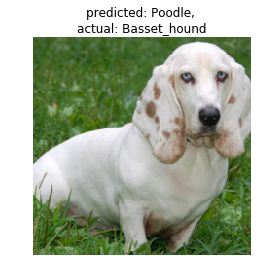

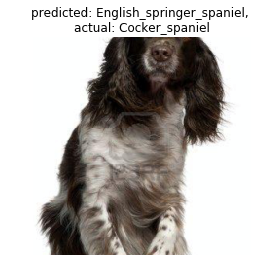

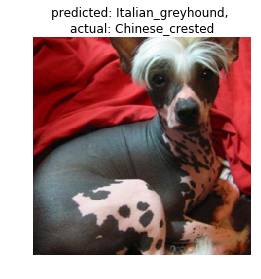

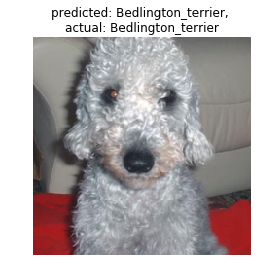

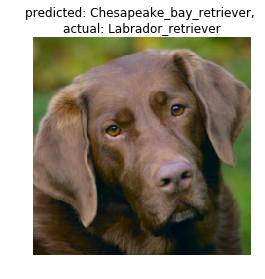

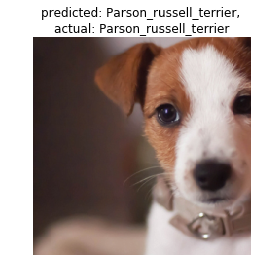

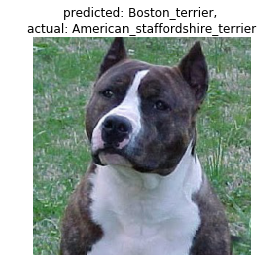

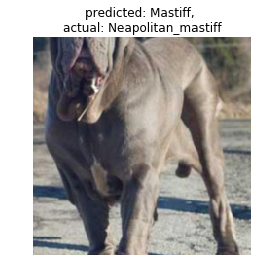

In [112]:
visualize_model(model_scratch,loaders_scratch,use_cuda, class_names, 20)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [113]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [114]:
def test(loaders, model, criterion, use_cuda):
    
    pred_arr = torch.zeros(0,dtype=torch.long, device='cpu')
    actual_arr = torch.zeros(0,dtype=torch.long, device='cpu')

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        _, preds = torch.max(output, 1)
        # Append batch prediction results
        pred_arr = torch.cat([pred_arr,preds.view(-1).cpu()])
        actual_arr = torch.cat([actual_arr,target.view(-1).cpu()])
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    return pred_arr.numpy(), actual_arr.numpy()
# call test function    
pred, actual = test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.760932


Test Accuracy: 54% (453/836)


In [115]:
len(pred)

836

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [54]:
## TODO: Specify data loaders
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of subprocesses to use for data loading
num_workers = 1
# how many samples per batch to load
batch_size = 20

train_data_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomSizedCrop(224),
        # transforms.CenterCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

data_transform = transforms.Compose([
        #transforms.RandomSizedCrop(224),
        transforms.Resize(256),
        transforms.CenterCrop(224),
        #transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])

loaders_transfer = {}
loaders_transfer['train'] = DataLoader(datasets.ImageFolder('/data/dog_images/train', transform=data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_transfer['valid'] = DataLoader(datasets.ImageFolder('/data/dog_images/valid', transform=data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)
loaders_transfer['test'] = DataLoader(datasets.ImageFolder('/data/dog_images/test', transform=data_transform), batch_size=batch_size, num_workers=num_workers, shuffle=True)

/opt/conda/lib/python3.6/site-packages/torchvision-0.2.1-py3.6.egg/torchvision/transforms/transforms.py:563: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [60]:
import torchvision.models as models
import torch.nn as nn
from torch.optim import lr_scheduler

model_transfer = models.resnet101(pretrained=True)
num_ftrs = model_transfer.fc.in_features
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_transfer.fc = nn.Linear(num_ftrs, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.torch/models/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:01<00:00, 99898680.14it/s] 


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
 resnet101 model was used. Resnet18, resnet34, resnet50, and resnet101 were compared respectively, and it was observed that restnet101 provided predictions with the highest accuracy. Resnet models were a well known design suitable for image classification purposes. As it was documented by pytorch, model with more layers produce high accuracy, different model was tested to verify how much accuracy improvment was achieved for the project. resnet18 produced 85% accuracy, resnet34 produced 88% accuracy, restnet50 produced 88% accuracy and resnet101 produced 90% accuracy. It was also observed that more time was taken during training as the number of layers in the model increased.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [61]:
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [62]:
# train the model
n_epochs = 8
model_transfer, train_record = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 2.879728 	Validation Loss: 1.065819
Validation loss decreased (inf --> 1.065819).  Saving model ...
Epoch: 2 	Training Loss: 0.930679 	Validation Loss: 0.537555
Validation loss decreased (1.065819 --> 0.537555).  Saving model ...
Epoch: 3 	Training Loss: 0.500338 	Validation Loss: 0.385663
Validation loss decreased (0.537555 --> 0.385663).  Saving model ...
Epoch: 4 	Training Loss: 0.289565 	Validation Loss: 0.343940
Validation loss decreased (0.385663 --> 0.343940).  Saving model ...
Epoch: 5 	Training Loss: 0.180701 	Validation Loss: 0.308818
Validation loss decreased (0.343940 --> 0.308818).  Saving model ...
Epoch: 6 	Training Loss: 0.120104 	Validation Loss: 0.293482
Validation loss decreased (0.308818 --> 0.293482).  Saving model ...
Epoch: 7 	Training Loss: 0.087216 	Validation Loss: 0.297399
Epoch: 8 	Training Loss: 0.062569 	Validation Loss: 0.278202
Validation loss decreased (0.293482 --> 0.278202).  Saving model ...


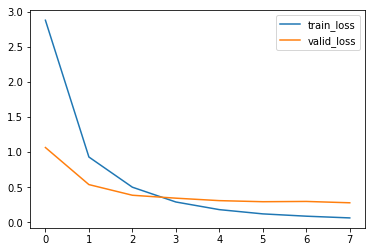

In [63]:
predict_result = train_record.reset_index(drop=True)
predict_result.plot()

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [64]:
pred, actual = test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.355710


Test Accuracy: 90% (753/836)


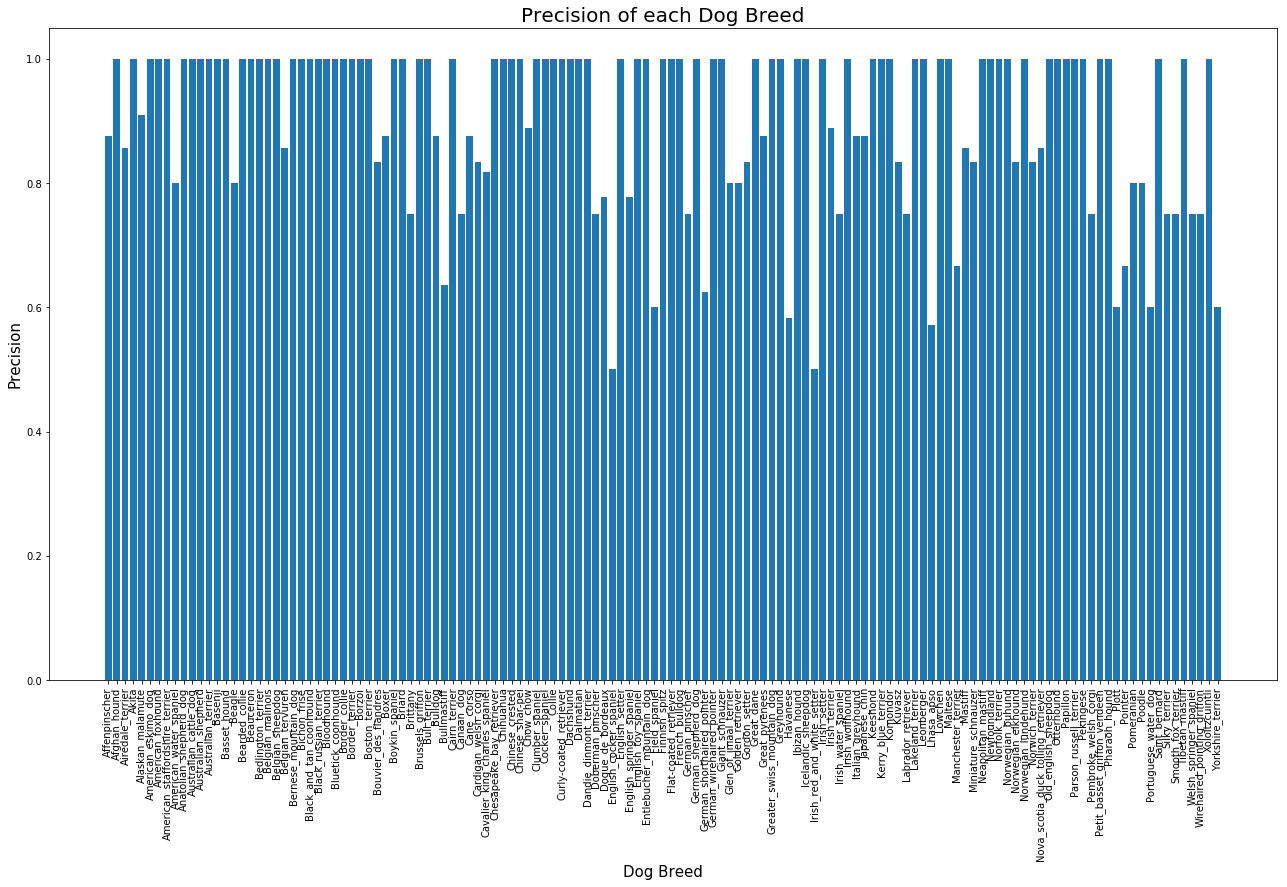

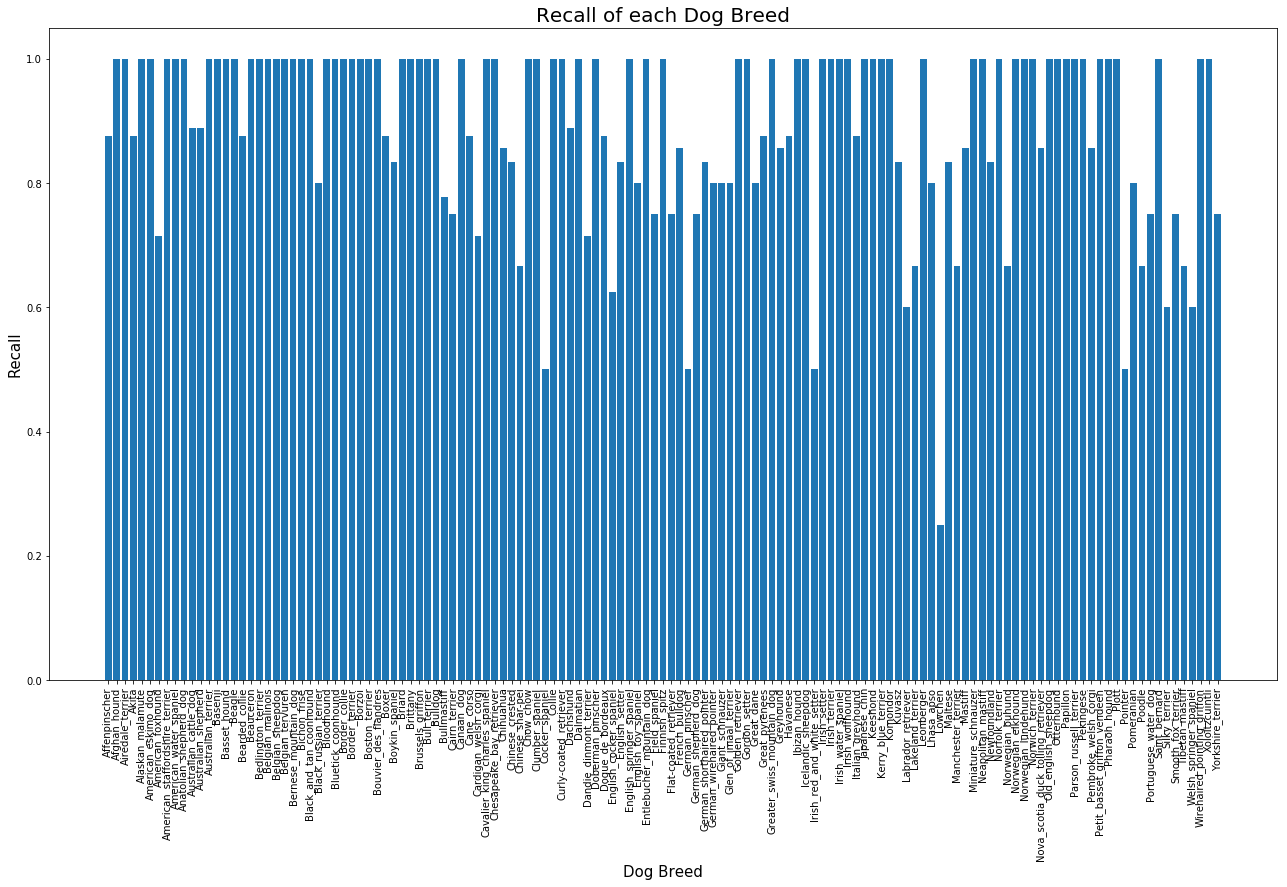

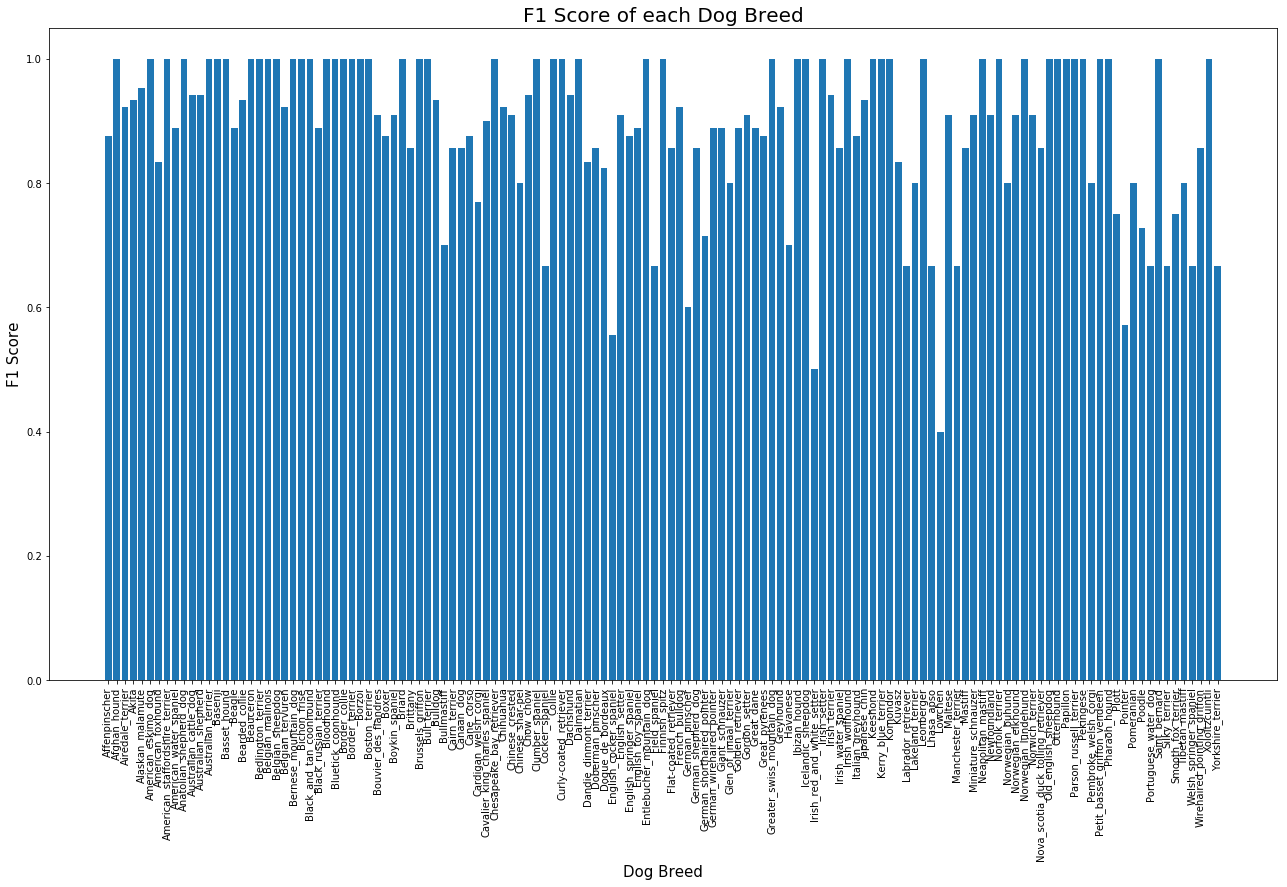

In [65]:
from sklearn.metrics import precision_recall_fscore_support

precision, recall, fscore, support = precision_recall_fscore_support(actual, pred)

def plot_test_results(measure, measure_name):
    plt.figure(figsize = (22, 12))

    plt.bar(class_names, measure)

    plt.xticks(rotation = 90)

    plt.xlabel('Dog Breed', fontsize = 15)
    plt.ylabel(measure_name, fontsize = 15)
    plt.title('{} of each Dog Breed'.format(measure_name), fontsize = 20)

    plt.show()
    
    return

plot_test_results(precision, 'Precision')
plot_test_results(recall, 'Recall')
plot_test_results(fscore, 'F1 Score')


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [99]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from PIL import Image

# list of class names by index, i.e. a name can be accessed like class_names[0]
# class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]

def predict_breed_transfer(img_path, k=3):
    
    input_image = Image.open(img_path)
    
    preprocess = transforms.Compose([
                    transforms.Resize(256),
                    transforms.CenterCrop(224),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                    ])
    
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
    
    if use_cuda:
        input_batch = input_batch.cuda()
    output = model_transfer(input_batch)
    
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    
    top_prob, top_catid = torch.topk(probabilities, k)

    return top_prob, top_catid

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [100]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path, k=3):
    ## handle cases for a human face, dog, and neither
    input_image = Image.open(img_path)
    
    if dog_detector(img_path):
        print("\nHello, dog!")
        plt.imshow(input_image)
        plt.show()
        top_prob, top_catid = predict_breed_transfer(img_path, k)
        for i in range(k):
            print("Top {} breed: {}, class probability: {:0.5f}".format(i+1, class_names[top_catid[i]], top_prob[i]))

    elif face_detector(img_path):
        print("\nHello, human!")
        plt.imshow(input_image)
        plt.show()
        print("You look like a ...")
        top_prob, top_catid = predict_breed_transfer(img_path, k)
        for i in range(k):
            print("Top {} breed: {}, class probability: {:0.5f}".format(i+1, class_names[top_catid[i]], top_prob[i]))

    else:
        print("\nThere's no dog or human in the picture.")
        plt.imshow(input_image)
        plt.show()
    
    return
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement) Overall, the output is better than expected. For improvements,
firstly, I would like to learn more about the process of building an image classification model from scratch and improve the prediction accuracy to around 80% to 90% level. Secondly, I would like to include more breeds in the classification training data. Lastly, notice the course also provide some instruction on building an interactive website using Flask, I would like to build a web app for this project and provide a user interface. 

In [106]:
dog_files[100:110]

array([ '/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04172.jpg',
       '/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04213.jpg',
       '/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04175.jpg',
       '/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04184.jpg',
       '/data/dog_images/train/059.Doberman_pinscher/Doberman_pinscher_04164.jpg',
       '/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03910.jpg',
       '/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03868.jpg',
       '/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03905.jpg',
       '/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03920.jpg',
       '/data/dog_images/train/055.Curly-coated_retriever/Curly-coated_retriever_03860.jpg'], 
      dtype='<U106')


Hello, human!


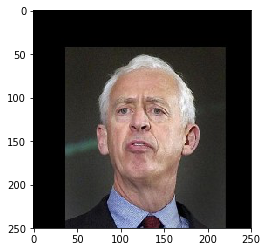

You look like a ...
Top 1 breed: Chinese_crested, class probability: 0.04227
Top 2 breed: Pharaoh_hound, class probability: 0.03328
Top 3 breed: Lowchen, class probability: 0.02044

Hello, human!


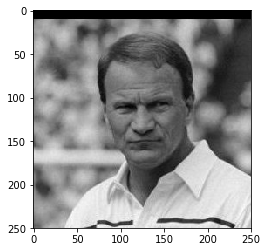

You look like a ...
Top 1 breed: Greyhound, class probability: 0.02621
Top 2 breed: Pharaoh_hound, class probability: 0.02295
Top 3 breed: Neapolitan_mastiff, class probability: 0.02090

Hello, human!


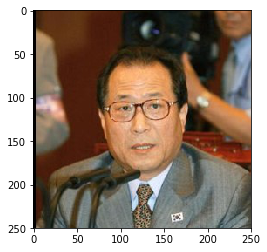

You look like a ...
Top 1 breed: Boxer, class probability: 0.02913
Top 2 breed: Pharaoh_hound, class probability: 0.02428
Top 3 breed: Bullmastiff, class probability: 0.02347

Hello, human!


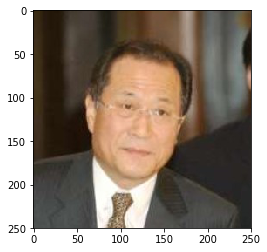

You look like a ...
Top 1 breed: Cardigan_welsh_corgi, class probability: 0.02444
Top 2 breed: Boxer, class probability: 0.02280
Top 3 breed: Afghan_hound, class probability: 0.01836

Hello, dog!


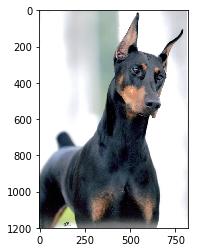

Top 1 breed: Doberman_pinscher, class probability: 0.98857
Top 2 breed: German_pinscher, class probability: 0.00815
Top 3 breed: Great_dane, class probability: 0.00163

Hello, dog!


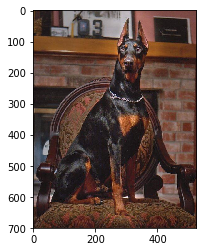

Top 1 breed: Doberman_pinscher, class probability: 0.99752
Top 2 breed: German_pinscher, class probability: 0.00121
Top 3 breed: Great_dane, class probability: 0.00053

Hello, dog!


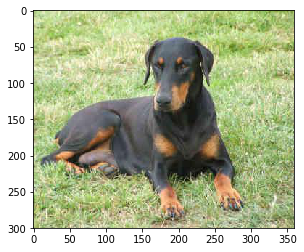

Top 1 breed: Doberman_pinscher, class probability: 0.99666
Top 2 breed: Black_and_tan_coonhound, class probability: 0.00105
Top 3 breed: German_pinscher, class probability: 0.00083

Hello, dog!


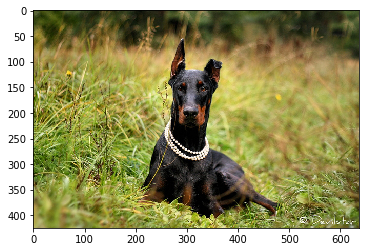

Top 1 breed: Doberman_pinscher, class probability: 0.99485
Top 2 breed: German_pinscher, class probability: 0.00276
Top 3 breed: Great_dane, class probability: 0.00056

Hello, dog!


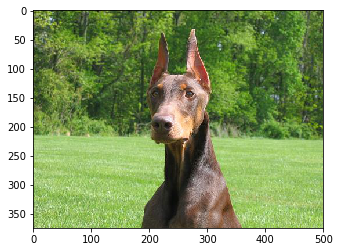

Top 1 breed: Doberman_pinscher, class probability: 0.99694
Top 2 breed: German_pinscher, class probability: 0.00167
Top 3 breed: Great_dane, class probability: 0.00033

Hello, dog!


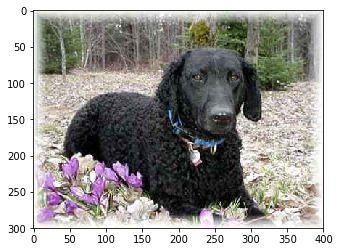

Top 1 breed: Curly-coated_retriever, class probability: 0.99896
Top 2 breed: American_water_spaniel, class probability: 0.00046
Top 3 breed: Chesapeake_bay_retriever, class probability: 0.00018

Hello, dog!


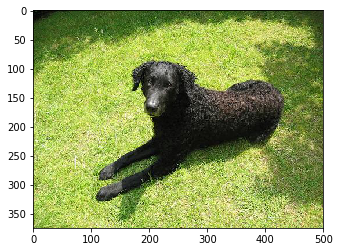

Top 1 breed: Curly-coated_retriever, class probability: 0.99960
Top 2 breed: Kuvasz, class probability: 0.00009
Top 3 breed: American_water_spaniel, class probability: 0.00006

Hello, dog!


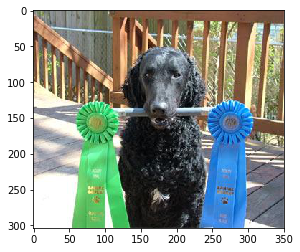

Top 1 breed: Curly-coated_retriever, class probability: 0.99979
Top 2 breed: American_water_spaniel, class probability: 0.00006
Top 3 breed: Flat-coated_retriever, class probability: 0.00003

Hello, dog!


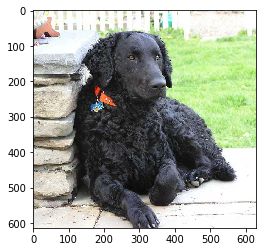

Top 1 breed: Curly-coated_retriever, class probability: 0.99741
Top 2 breed: American_water_spaniel, class probability: 0.00107
Top 3 breed: Kuvasz, class probability: 0.00035

Hello, dog!


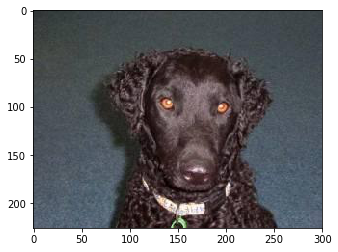

Top 1 breed: Curly-coated_retriever, class probability: 0.99781
Top 2 breed: American_water_spaniel, class probability: 0.00146
Top 3 breed: Irish_water_spaniel, class probability: 0.00027


In [107]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[3:7], dog_files[100:110])):
    run_app(file)